In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [166]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [167]:
print("number of rows:",df.shape[0])
print("number of colomns:",df.shape[1])

number of rows: 284807
number of colomns: 31


In [168]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [170]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [171]:
dup = df.isnull().sum()
dup

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [172]:

dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}' )

number of duplicated rows are 1081


In [173]:
df.drop_duplicates(inplace=True)

In [174]:
a=df.duplicated().sum()
a

0

In [175]:
df["Class"].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

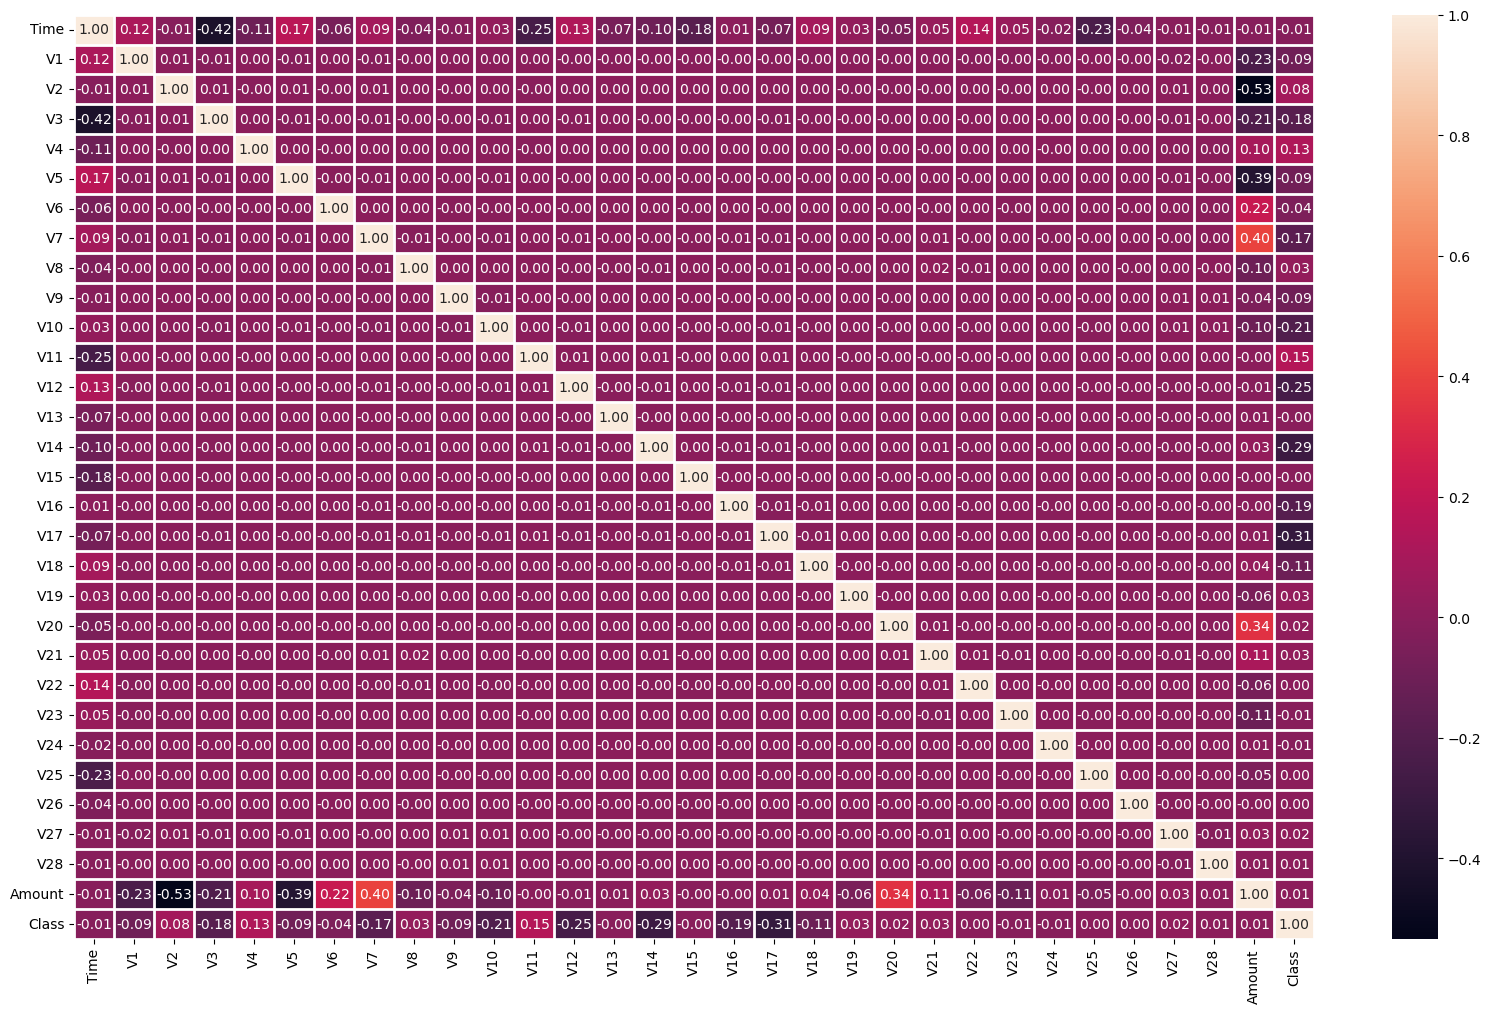

In [176]:
plt.figure(figsize=(20, 12)) 
ax = sb.heatmap(df.corr(), annot=True, fmt=".2f")

for i in range(df.shape[1] + 1):
    ax.axvline(i, color="white", lw=2)
    ax.axhline(i, color="white", lw=2)

plt.show()


In [177]:
def split_data_by_class(df):
    legit = df[df["Class"]==0]
    fraud = df[df["Class"]==1]
    return legit,fraud
legit_df,fraud_df = split_data_by_class(df)

In [178]:
legit_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283253 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283253 non-null  float64
 1   V1      283253 non-null  float64
 2   V2      283253 non-null  float64
 3   V3      283253 non-null  float64
 4   V4      283253 non-null  float64
 5   V5      283253 non-null  float64
 6   V6      283253 non-null  float64
 7   V7      283253 non-null  float64
 8   V8      283253 non-null  float64
 9   V9      283253 non-null  float64
 10  V10     283253 non-null  float64
 11  V11     283253 non-null  float64
 12  V12     283253 non-null  float64
 13  V13     283253 non-null  float64
 14  V14     283253 non-null  float64
 15  V15     283253 non-null  float64
 16  V16     283253 non-null  float64
 17  V17     283253 non-null  float64
 18  V18     283253 non-null  float64
 19  V19     283253 non-null  float64
 20  V20     283253 non-null  float64
 21  V21     283253 

In [179]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 473 entries, 541 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    473 non-null    float64
 1   V1      473 non-null    float64
 2   V2      473 non-null    float64
 3   V3      473 non-null    float64
 4   V4      473 non-null    float64
 5   V5      473 non-null    float64
 6   V6      473 non-null    float64
 7   V7      473 non-null    float64
 8   V8      473 non-null    float64
 9   V9      473 non-null    float64
 10  V10     473 non-null    float64
 11  V11     473 non-null    float64
 12  V12     473 non-null    float64
 13  V13     473 non-null    float64
 14  V14     473 non-null    float64
 15  V15     473 non-null    float64
 16  V16     473 non-null    float64
 17  V17     473 non-null    float64
 18  V18     473 non-null    float64
 19  V19     473 non-null    float64
 20  V20     473 non-null    float64
 21  V21     473 non-null    float64
 22  V2

In [180]:
legit_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,...,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.0
mean,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.001150,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575,0.0
std,47475.550607,1.922179,1.633520,1.457593,1.398575,1.355816,1.329914,1.177480,1.157140,1.086902,...,0.715629,0.723541,0.621165,0.605748,0.520612,0.482080,0.392700,0.327563,250.379023,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54233.000000,-0.913431,-0.601398,-0.883966,-0.851605,-0.687888,-0.767543,-0.550146,-0.208841,-0.641649,...,-0.228406,-0.542737,-0.161490,-0.354306,-0.317476,-0.326853,-0.070650,-0.052808,5.670000,0.0
50%,84711.000000,0.022562,0.062561,0.182247,-0.024500,-0.052807,-0.274172,0.041664,0.021633,-0.051368,...,-0.029798,0.006675,-0.011077,0.041115,0.016190,-0.052293,0.001368,0.011238,22.000000,0.0
75%,139308.000000,1.316788,0.797012,1.028261,0.734231,0.612442,0.397678,0.571029,0.324473,0.596969,...,0.185470,0.528136,0.147633,0.440051,0.350490,0.240023,0.090760,0.077961,77.460000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [181]:
fraud_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,...,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.0
mean,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860,1.0
std,48636.179973,6.593145,4.122500,6.909647,2.871523,5.278831,1.715347,6.858024,5.585950,2.465047,...,2.731191,1.181295,1.508570,0.517900,0.806785,0.463016,1.245779,0.533100,260.211041,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41203.000000,-5.603690,1.145381,-7.926507,2.288644,-4.278983,-2.450444,-6.989195,-0.161518,-3.796760,...,0.027935,-0.521934,-0.341881,-0.436539,-0.320311,-0.263078,-0.015551,-0.097223,1.000000,1.0
50%,73408.000000,-2.271755,2.617105,-4.875397,4.100098,-1.372245,-1.420468,-2.902079,0.617738,-2.099049,...,0.573898,0.055179,-0.075034,-0.061263,0.077913,0.012792,0.394682,0.145895,9.820000,1.0
75%,129095.000000,-0.361428,4.571743,-2.171454,6.290918,0.260821,-0.413647,-0.907188,1.709417,-0.788388,...,1.192694,0.616383,0.287659,0.282030,0.463827,0.395528,0.821048,0.372393,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [182]:
new_legit_df = legit_df.sample(n=492)
new_legit_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33173,37118.0,-0.651404,0.354142,1.668975,-0.028256,0.206913,0.317692,0.603516,-0.000469,0.520627,...,-0.078987,0.025552,-0.311810,-0.456262,0.072591,0.552357,-0.236033,-0.132955,39.99,0
94572,64946.0,-1.026217,0.521310,1.334153,0.233780,0.432543,-0.930778,0.516840,-0.002001,-0.358621,...,-0.236785,-0.437754,0.581439,0.346615,-0.145118,0.090378,0.208053,0.034542,1.98,0
50234,44402.0,1.219039,0.223617,-0.078104,0.806712,0.494330,0.587377,-0.049195,0.143750,-0.235501,...,0.079331,0.283542,-0.244796,-1.137920,0.732682,-0.197278,0.030016,-0.001894,10.00,0
213558,139304.0,-2.126775,0.242733,0.581965,2.985607,2.202119,1.499731,0.406483,-1.763601,-0.427914,...,1.270880,0.626040,1.072604,-1.049290,-0.015541,0.146370,0.226271,-0.659400,0.00,0
149339,91046.0,-2.169094,-0.324509,1.284432,4.987514,1.591528,0.456044,1.617674,-1.524913,1.373529,...,-0.696347,0.896404,0.755369,-0.128048,-0.440419,0.252077,-1.570085,-0.861307,48.59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250356,154863.0,1.987499,-0.161239,-1.076405,0.000865,0.068832,0.078717,-0.582877,0.172835,0.993953,...,-0.238003,-0.568641,0.342111,0.095622,-0.455399,-0.304275,0.020535,-0.017171,3.62,0
277464,167664.0,2.035502,-0.031224,-1.157957,0.203934,0.211767,-0.588220,0.139702,-0.208063,0.123793,...,-0.239990,-0.526359,0.280136,-0.363162,-0.259510,0.200062,-0.063981,-0.071553,1.29,0
236163,148693.0,0.946272,-1.877698,-0.871448,0.713015,-0.463782,1.670281,-0.695787,0.468716,1.281643,...,0.504550,0.754667,-0.072342,-0.361228,-0.874773,0.528036,-0.002065,0.071752,462.37,0
258992,158909.0,-1.641638,0.617621,0.906455,-0.233154,-0.293163,-0.571973,-0.072222,0.295183,0.679092,...,-0.066656,-0.211167,0.376538,-0.147529,-0.577206,-0.615438,-0.610960,0.275900,2.95,0


In [183]:
combine_df = pd.concat([new_legit_df, fraud_df], axis = 0)
combine_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33173,37118.0,-0.651404,0.354142,1.668975,-0.028256,0.206913,0.317692,0.603516,-0.000469,0.520627,...,-0.078987,0.025552,-0.311810,-0.456262,0.072591,0.552357,-0.236033,-0.132955,39.99,0
94572,64946.0,-1.026217,0.521310,1.334153,0.233780,0.432543,-0.930778,0.516840,-0.002001,-0.358621,...,-0.236785,-0.437754,0.581439,0.346615,-0.145118,0.090378,0.208053,0.034542,1.98,0
50234,44402.0,1.219039,0.223617,-0.078104,0.806712,0.494330,0.587377,-0.049195,0.143750,-0.235501,...,0.079331,0.283542,-0.244796,-1.137920,0.732682,-0.197278,0.030016,-0.001894,10.00,0
213558,139304.0,-2.126775,0.242733,0.581965,2.985607,2.202119,1.499731,0.406483,-1.763601,-0.427914,...,1.270880,0.626040,1.072604,-1.049290,-0.015541,0.146370,0.226271,-0.659400,0.00,0
149339,91046.0,-2.169094,-0.324509,1.284432,4.987514,1.591528,0.456044,1.617674,-1.524913,1.373529,...,-0.696347,0.896404,0.755369,-0.128048,-0.440419,0.252077,-1.570085,-0.861307,48.59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


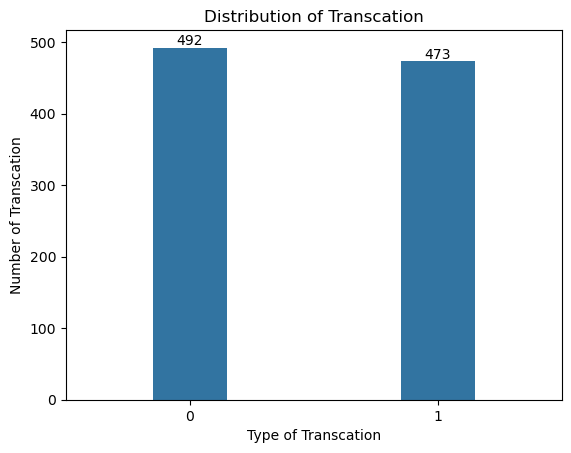

In [184]:
 ax =  sb.countplot( data = combine_df, x= "Class"  ,width =0.3)
ax.set_title("Distribution of Transcation")
plt.xlabel("Type of Transcation")
plt.ylabel("Number of Transcation")
for i in ax.containers:
    ax.bar_label(i)

plt.show()

In [185]:
x = combine_df.drop(columns = "Class",axis =1)
y = combine_df["Class"]

In [186]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [188]:
model_log = LogisticRegression()
model_log.fit(x_train,y_train)

C:\Users\Katta\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [192]:
pred_log= model_log.predict(x_test)
pred_log

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [193]:
from sklearn.metrics import accuracy_score
print ("accuracy of Logistic Regression model:",accuracy_score(y_test,pred_log))

accuracy of Logistic Regression model: 0.917098445595855


In [194]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_log))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        94
           1       0.97      0.87      0.91        99

    accuracy                           0.92       193
   macro avg       0.92      0.92      0.92       193
weighted avg       0.92      0.92      0.92       193



In [224]:
from sklearn.ensemble import RandomForestClassifier
model_random = RandomForestClassifier(random_state=42)
model_random.fit(x_train,y_train)
predict_random = model_random.predict(x_test)


In [226]:
print(classification_report(y_test,predict_random))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        94
           1       0.93      0.86      0.89        99

    accuracy                           0.90       193
   macro avg       0.90      0.90      0.90       193
weighted avg       0.90      0.90      0.90       193



In [228]:
print ("accuracy of RandomForestClassifier model:",accuracy_score(y_test,predict_random))

accuracy of RandomForestClassifier model: 0.8963730569948186
